In [7]:
"""📦 Step 0: Install required packages and confirm versions"""
!pip install -q --upgrade tensorflow keras-nlp

import tensorflow as tf
import keras_nlp
print(f"TensorFlow version: {tf.__version__}")
print(f"Keras NLP version: {keras_nlp.__version__}")


TensorFlow version: 2.18.1
Keras NLP version: 0.20.0


In [8]:
""" Section 1: Inference using a pretrained BERT classifier"""
print("=== Text Classification with BERT ===")

classifier = keras_nlp.models.BertClassifier.from_preset(
    "bert_base_en_uncased",
    num_classes=2
)
classifier.summary(line_length=100)

examples = [
    "I can't believe how bad the customer service was at that bank.",
    "The new smartphone has incredible battery life and a stunning display!",
    "Honestly, I'm undecided about the movie. Some parts were good, others not so much.",
    "Despite the delay, the airline staff handled everything professionally.",
    "This internship has been a transformative learning experience for me."
]

print("\nInference with BERT Classifier:")
results = classifier.predict(examples)

import numpy as np
def softmax(x):
    exp_x = np.exp(x - np.max(x, axis=1, keepdims=True))
    return exp_x / np.sum(exp_x, axis=1, keepdims=True)

probabilities = softmax(results)

print("\nClassification results:")
for i, example in enumerate(examples):
    predicted_class = np.argmax(probabilities[i])
    confidence = probabilities[i][predicted_class]
    sentiment = "Positive" if predicted_class == 1 else "Negative"
    print(f"Text: {example}")
    print(f"Prediction: {sentiment} (Confidence: {confidence:.4f})")
    print("-" * 50)


=== Text Classification with BERT ===


Preprocessor: "bert_text_classifier_preprocessor_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                                             ┃                                Config ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ bert_tokenizer (BertTokenizer)                           │                    Vocab size: 30,522 │
└──────────────────────────────────────────────────────────┴───────────────────────────────────────┘

Model: "bert_text_classifier_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                ┃ Output Shape            ┃        Param # ┃ Connected to            ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━┩
│ padding_mask (InputLayer)   │ (None, None)            │              0 │ -                       │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ segment_ids (InputLayer)    │ (None, None)            │              0 │ -                       │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ token_ids (InputLayer)      │ (None, None)            │              0 │ -                       │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ bert_backbone               │ [(None, 768), (None,    │    109,482,240 │ padding_mask[0][0],     │
│ (BertBackbone)              │ None, 768)]             │                │ segment_ids[0][0],      │
│                             │                         │                │ token_ids[0][0]         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ classifier_dropout          │ (None, 768)             │              0 │ bert_backbone[0][0]     │
│ (Dropout)                   │                         │                │                         │
├─────────────────────────────┼─────────────────────────┼────────────────┼─────────────────────────┤
│ logits (Dense)              │ (None, 2)               │          1,538 │ classifier_dropout[0][… │
└─────────────────────────────┴─────────────────────────┴────────────────┴─────────────────────────┘

 Total params: 109,483,778 (417.65 MB)

 Trainable params: 109,483,778 (417.65 MB)

 Non-trainable params: 0 (0.00 B)


Inference with BERT Classifier:
1/1 ━━━━━━━━━━━━━━━━━━━━ 16s 16s/step

Classification results:
Text: I can't believe how bad the customer service was at that bank.
Prediction: Positive (Confidence: 0.5714)
--------------------------------------------------
Text: The new smartphone has incredible battery life and a stunning display!
Prediction: Positive (Confidence: 0.6686)
--------------------------------------------------
Text: Honestly, I'm undecided about the movie. Some parts were good, others not so much.
Prediction: Positive (Confidence: 0.5337)
--------------------------------------------------
Text: Despite the delay, the airline staff handled everything professionally.
Prediction: Positive (Confidence: 0.6354)
--------------------------------------------------
Text: This internship has been a transformative learning experience for me.
Prediction: Positive (Confidence: 0.5629)
--------------------------------------------------


In [9]:
""" Section 2: Sentence Embeddings using BERT pooled output"""
print("\n=== Using BERT for Sentence Embeddings ===")

embedding_model = keras_nlp.models.BertClassifier.from_preset(
    "bert_base_en_uncased",
    num_classes=2,
    classifier_activation=None
)

def get_embeddings(texts):
    inputs = embedding_model.preprocessor(texts)
    outputs = embedding_model.backbone(inputs)
    return outputs["pooled_output"].numpy()

sentences = [
    "Cloud computing enables businesses to scale their infrastructure efficiently.",
    "Statistical models are the foundation of modern data science workflows.",
    "Interning at a startup taught me how to wear multiple hats under pressure.",
    "I regularly follow AI policy discussions to understand ethical implications."
]

embeddings = get_embeddings(sentences)
print("\nGenerated embeddings successfully.")
print(f"Embeddings shape: {embeddings.shape}")



=== Using BERT for Sentence Embeddings ===

Generated embeddings successfully.
Embeddings shape: (4, 768)


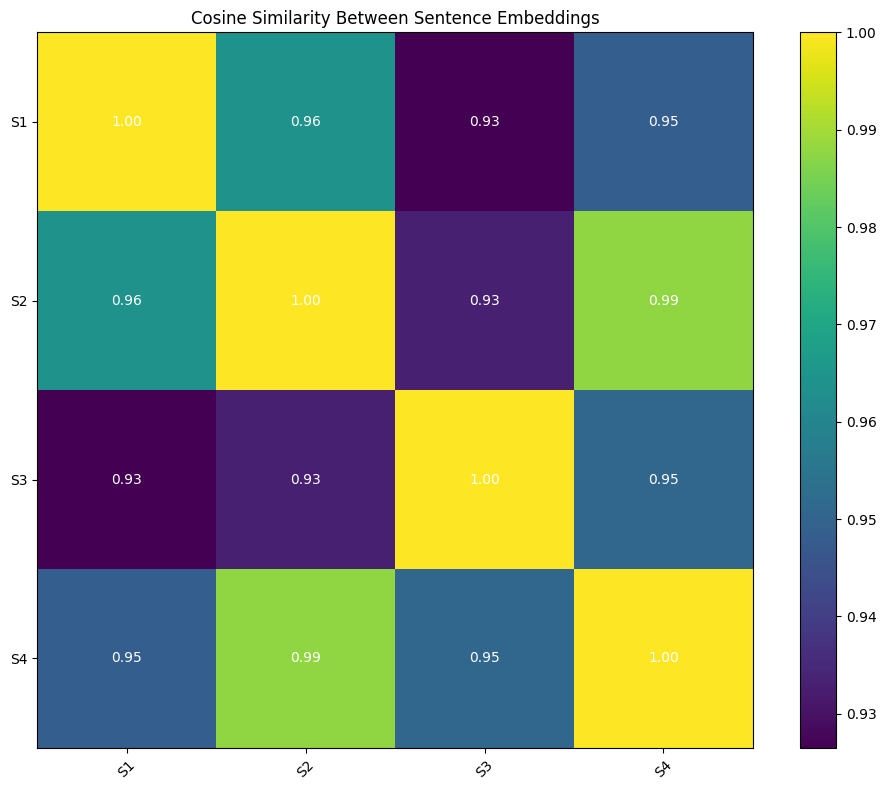


Sentences:
S1: Cloud computing enables businesses to scale their infrastructure efficiently.
S2: Statistical models are the foundation of modern data science workflows.
S3: Interning at a startup taught me how to wear multiple hats under pressure.
S4: I regularly follow AI policy discussions to understand ethical implications.


In [10]:
""" Visualize cosine similarity between sentence embeddings"""
import matplotlib.pyplot as plt

def cosine_similarity(a, b):
    return np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))

similarity_matrix = np.zeros((len(sentences), len(sentences)))
for i in range(len(sentences)):
    for j in range(len(sentences)):
        similarity_matrix[i, j] = cosine_similarity(embeddings[i], embeddings[j])

plt.figure(figsize=(10, 8))
plt.imshow(similarity_matrix, cmap='viridis')
plt.colorbar()
plt.xticks(np.arange(len(sentences)), [f"S{i+1}" for i in range(len(sentences))], rotation=45)
plt.yticks(np.arange(len(sentences)), [f"S{i+1}" for i in range(len(sentences))])
for i in range(len(sentences)):
    for j in range(len(sentences)):
        plt.text(j, i, f"{similarity_matrix[i, j]:.2f}", ha='center', va='center', color='white')
plt.title('Cosine Similarity Between Sentence Embeddings')
plt.tight_layout()
plt.show()

print("\nSentences:")
for i, sentence in enumerate(sentences):
    print(f"S{i+1}: {sentence}")


In [11]:
""" Section 3: Text Generation using GPT-2 from keras-nlp"""
print("\n=== Text Generation with GPT-2 ===")

gpt2_generator = keras_nlp.models.GPT2CausalLM.from_preset("gpt2_base_en")

prompts = [
    "Large language models have revolutionized how we",
    "A successful data science project begins with",
    "In the next decade, we expect artificial intelligence to",
    "One of the biggest ethical challenges in AI is",
    "Using generative models in healthcare can help doctors"
]

for prompt in prompts:
    print(f"Prompt: {prompt}")
    output = gpt2_generator.generate(prompt, max_length=100)
    print(f"Generated text: {output}")
    print("-" * 80)



=== Text Generation with GPT-2 ===
Prompt: Large language models have revolutionized how we
Generated text: Large language models have revolutionized how we communicate. We can use language models to help us to communicate and understand the world, or to understand the world as a whole. These languages have the potential to change how we understand and understand our surroundings.

Language models have been around a long time, and they've been around for decades. The language models are the best way to learn new languages.

What languages do you use when speaking to your friends? Are they good or bad?
--------------------------------------------------------------------------------
Prompt: A successful data science project begins with
Generated text: A successful data science project begins with a simple question: what do we know about our data? In this blog post I will provide a simple answer: the answer is a lot of fun.

In this case I am a data scientist. In this blog post we will u

In [12]:
""" Section 4: Token-level Embeddings for NER use case"""
print("\n=== Named Entity Recognition with BERT ===")

def get_token_embeddings(text):
    inputs = embedding_model.preprocessor([text])
    outputs = embedding_model.backbone(inputs)
    return outputs["sequence_output"].numpy()

example_text = (
    "Dr. Aisha Patel from Stanford University presented her climate research "
    "at the United Nations conference in Geneva, Switzerland in 2023."
)

print(f"Example text for NER: {example_text}")
token_embeddings = get_token_embeddings(example_text)
print(f"Token embeddings shape: {token_embeddings.shape}")
print("Note: In a real NER implementation, these token embeddings would be passed to a token-level classifier head.")



=== Named Entity Recognition with BERT ===
Example text for NER: Dr. Aisha Patel from Stanford University presented her climate research at the United Nations conference in Geneva, Switzerland in 2023.
Token embeddings shape: (1, 512, 768)
Note: In a real NER implementation, these token embeddings would be passed to a token-level classifier head.
